<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Integracion_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integracion MC**

El metodo de integración de Monte Carlo es un método que utiliza números aleatorios para estimar el valor de una integral definida

Considere una función $ 𝑓:[ 𝑎,𝑏 ] → 𝑅 $ que es integrable en el intervalo abierto
$(𝑎,𝑏)$ y supongamos que queremos evaluar la integral

$$\int _{a}^{b}\!f(x)dx$$

siendo esta una integral complicada de evaluar de forma analítica.

Esta integral puede expresarse en términos de la esperanza de cierta variable aleatoria, de la siguente manera


$ \int _{a}^{b}f(x)dx=(b-a)\operatorname {E} [f(X)]$

donde $f(X)$ es la variable aleatoria con

$ X\sim \operatorname {U} (a,b)$ , lo anterior es válido pues

$\begin{aligned}\operatorname {E} [f(X)]&=\int _{\mathbb {R} }f(x)g_{X}(x)dx\\&=\int _{a}^{b}f(x)\;{\frac {1}{b-a}}\;dx\\&={\frac {1}{b-a}}\int _{a}^{b}f(x)dx\end{aligned}$

por lo que

$ \int _{a}^{b}f(x)dx=(b-a)\operatorname {E} [f(X)]$

siendo


$g _{X}(x)={\frac {1}{b-a}}$

la función de densidad de
$ X\sim \operatorname {U} (a,b)$

Lo que se busca es estimar
$\operatorname {E} [f(X)]$ entonces por la Ley fuerte de los Grandes Números

${E} [f(X)]\approx {\frac {1}{n}}\sum _{i=1}^{n}f(X_{i})$

por lo que

$ \int _{a}^{b}f(x)dx\approx {\frac {b-a}{n}}\sum _{i=1}^{n}f(x_{i})$

Mientras más grande sea $n$, es decir, si
$ n\to \infty $, más exacta será la aproximación entonces

=$\int _{a}^{b}f(x)dx=\lim _{n\to \infty }{\frac {b-a}{n}}\sum _{i=1}^{n}f(x_{i})$

**Ejemplo**

entonces para desarrollar el siguente ejemplo

$\int _{0}^{1}\sqrt{arctan(x)} dx$

como

$I= (b-a) E[g(X)]$

donde $g(X)=\sqrt{arctan(x)}$

y con el estimador insesgado

$\theta_1= (b-a) {\frac {1}{n}}\sum _{i=1}^{n}g(X_{i})$ con $X_i ∼ U(0,1)$

Podemos implementar el siguiente codigo, que realiza la aproximacion con el Algoritmo MC de la Media Muestral


Estimación de la integral: 0.62974966854478
Intervalo de confianza al 99%: (0.5735285447717382, 0.6859707923178218)


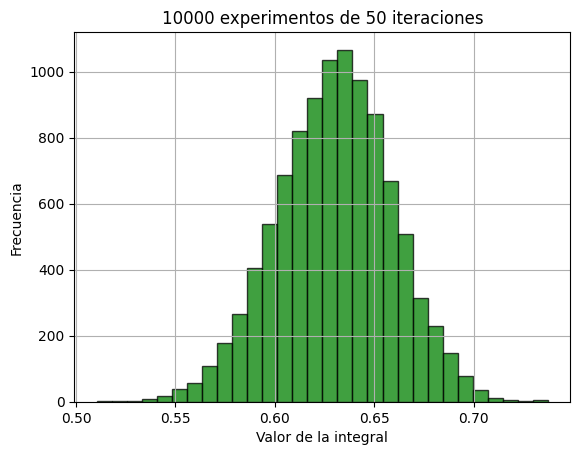

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la función g(x)
def g(x):
    return np.sqrt(np.arctan(x))

# Parámetros
a = 0
b = 1
num_exp = 10000  # Número de experimentos
num_iter = 50     # Número de iteraciones por experimento

# Almacenar las estimaciones de la integral en cada experimento
estimations = []

for _ in range(num_exp):
    # Paso 1: Generar n números uniformes U_i ~ Unif(0, 1)
    U = np.random.uniform(a, b, num_iter)

    # Paso 2: Calcular X_i = a + U_i(b - a)
    X = a + U * (b - a)

    # Paso 3: Calcular g(X_i)
    g_X = g(X)

    # Paso 4: Estimar I calculando la media muestral θ1
    theta1 = (b - a) * np.mean(g_X)

    # Almacenar la estimación
    estimations.append(theta1)

# Convertir las estimaciones en un array de numpy
estimations = np.array(estimations)

# Calcular el intervalo de confianza
alpha = 0.01  # Nivel de significancia para un intervalo de confianza del 99%
z = norm.ppf(1 - alpha/2) #Obtenemos el valor de Z
sigma = np.std(g_X) / np.sqrt(n)
intervalo_confianza = (theta1 - z * sigma, theta1 + z * sigma)

# Resultados
print(f"Estimación de la integral: {theta1}")
print(f"Intervalo de confianza al 99%: {intervalo_confianza}")

# Gráfica del histograma
plt.hist(estimations, bins=30, alpha=0.75, color='green', edgecolor='black')
plt.title('10000 experimentos de 50 iteraciones')
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Método de acierto y error**
Para este metodo se debe de interpretar la integral como el  ́area bajo la
curva en una region rectangular, esto de la siguiente manera

${0 ≤ x ≤ 1}× {0 ≤ g(x) ≤c}$

donde c es un valor que acota a la funcion en todo el intervalo

Con esto, sigue generar $n$ puntos aleatorios que deben caer dentro del el rectangulo

Luego, como la probabilidad de que el punto este por debajo de la curva es

$p=\frac{I}{c(b-a)}$

con el parametro

$\hat{p}=\frac{n_a}{n}$

Entonces

$I≈ \theta_2 = c(b-a) \frac{n_a}{n}$

donde $n_a$ es el numero de veces que el punto este por debajo de la curva

Con esto, y siguiendo el algoritmo de MC de acierto y error podemos implementar el siguiente codigo





Estimación de la integral: 0.6203588478169305
Intervalo de confianza al 99%: (0.5735285447717382, 0.6859707923178218)


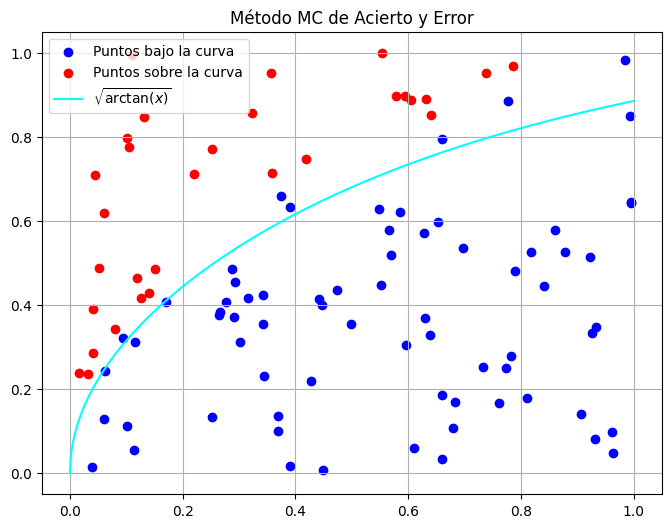

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función g(x)
def g(x):
    return np.sqrt(np.arctan(x))

# Parámetros
a = 0
b = 1
n = 100  # Número de puntos

# Valor máximo de g(x) en el intervalo [0, 1]
c = g(1)

# Paso 1: Generar números uniformes U_i ~ Unif(0, 1) para i=1,..., 2n
U = np.random.uniform(a, b, 2 * n)

# Paso 2: Conformar pares (U_i, U_{n+i})
U1 = U[:n]
U2 = U[n:]

# Paso 3: Calcular X_i = a + U_i(b - a)
X = a + U1 * (b - a)

# Paso 4: Calcular g(X_i)
g_X = g(X)

# Paso 5: Contar los aciertos n_a tales que g(X_i) > c * U_{n+i}
n_a = np.sum(g_X > c * U2)

# Paso 6: Estimar I calculando la media muestral θ2
theta2 = c * (b - a) * n_a / n

# Calcular el intervalo de confianza
alpha = 0.01  # Nivel de significancia para un intervalo de confianza del 99%
p_hat = n_a / n
sigma = np.sqrt(p_hat * (1 - p_hat) / n)
interval0_confianza = (theta2 - z * sigma, theta2 + z * sigma)

# Resultados
print(f"Estimación de la integral: {theta2}")
print(f"Intervalo de confianza al 99%: {intervalo_confianza}")

# Determinar los puntos por debajo y por encima de la curva
puntos_debajo = g_X > c * U2

# Crear la gráfica
plt.figure(figsize=(8, 6))
# Graficar los puntos por debajo de la curva en azul
plt.scatter(X[puntos_debajo], U2[puntos_debajo], color='blue', label='Puntos bajo la curva')
# Graficar los puntos por encima de la curva en rojo
plt.scatter(X[~puntos_debajo], U2[~puntos_debajo], color='red', label='Puntos sobre la curva')

# Graficar la curva g(x)
x_values = np.linspace(a, b, 500)
y_values = g(x_values)
plt.plot(x_values, y_values, color='cyan', label=r'$\sqrt{\arctan(x)}$')

# Añadir etiquetas y leyenda

plt.title(r'Método MC de Acierto y Error')
plt.legend()
plt.grid(True)
plt.show()


**Comparacion de los resultados entre ambos metodos**



\begin{array}{|c|c|} \hline
Método & n=100 & n=1000 & n=10000 \\ \hline
Media muestral & 0.626348 &0.639134  & 0.629749 \\
Acierto y Error & 0.620358 & 0.61770 & 0.629752\\ \hline
\end{array}

Donde la solucion a la integral es

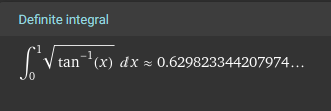


Podemos observar que los resultados a traves de estos metodos se aproximan mas cuando $n$ es mas grande.